# Selecting a sensors for LMEM. Plotting topomaps (regression coef. - color). For extremes. You can use the same algorithm for mean beta.

# Выбор инициативной модели для дальнейшего упрощения LMEM   
full LMEM

In [1]:
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import copy
import pandas as pd
import statsmodels.stats.multitest as mul

In [2]:
# in order to create Evoked from MEM data (regression coeff and p_value), 
#which we need for topomaps plotting we need .info attribute, which we can take from donor. 
#You can use another donor
donor = mne.Evoked("/home/vera/MNE/MEM_regression/MEM_old_right_baseline/030_koal_comb_planar_act1_st.fif")

    Found the data of interest:
        t =       0.00 ...    6746.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 27 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.


/home/vera/anaconda3/lib/python3.8/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/home/vera/anaconda3/lib/python3.8/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/home/vera/anaconda3/lib/python3.8/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/home/vera/anaconda3/lib/python3.8/site-packages/mne/io/tag.py:427: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  ch_name = ch_name[:np.argmax(ch_name == b'')].tostring()
/home/vera/anaconda3/lib/python3.8/site-packages/mne/io/tag.py:427: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  ch_name = ch_name[:np.argmax(ch_name == b'')].tostring()
/home/vera/anaconda3/lib/python3.8/

In [14]:
sensors = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/sensors.csv')
sensors.head()

,Num,Name
0,0,MEG0112
1,1,MEG0122
2,2,MEG0132
3,3,MEG0142
4,4,MEG0212


# Выбираем сеносры с наименьшим значением p value (получены по полной LMEM)

# Probing

In [4]:
# read data, which were obtained by full LMEM (reg coef and p_value for each combined planar - 102)
# 1 - 2 full LMEM active1
df1 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor_extremums/active1_st_maximum_PostM_full_LMEM.csv')
df2 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor_extremums/active1_st_minimums_PreM_full_LMEM.csv')

In [15]:
df1['Sensors_name'] = sensors['Name']
df1['Sensors_number'] = sensors['Num']
df2['Sensors_name'] = sensors['Name']
df2['Sensors_number'] = sensors['Num']

In [16]:
# Minimum PreM
b = df2.sort_values(by=['p_val'])
b.head()

,reg_coeff,p_val,Sensors_name,Sensors_number
18,0.077671,0.016772,MEG0532,18
19,0.082909,0.032842,MEG0542,19
59,0.110236,0.069905,MEG1622,59
4,0.113573,0.073957,MEG0212,4
31,0.062705,0.081029,MEG0922,31


In [17]:
# Maximum PostM

a = df1.sort_values(by=['p_val'])
a.head()

,reg_coeff,p_val,Sensors_name,Sensors_number
93,-0.156184,0.000021,MEG2442,93
60,-0.153809,0.000039,MEG1632,60
90,-0.125426,0.000272,MEG2412,90
63,-0.139486,0.000376,MEG1722,63
77,-0.159995,0.000551,MEG2042,77


# Targeted 

In [8]:
# read data, which were obtained by full LMEM (reg coef and p_value for each combined planar - 102)
# 7 - 8 full LMEM
df7 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor_extremums/active2_end_maximum_PostM_full_LMEM.csv')
df8 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor_extremums/active2_end_minimums_PreM_full_LMEM.csv')

In [18]:
df7['Sensors_name'] = sensors['Name']
df7['Sensors_number'] = sensors['Num']
df8['Sensors_name'] = sensors['Name']
df8['Sensors_number'] = sensors['Num']

In [19]:
# Minimum PreM
h = df8.sort_values(by=['p_val'])
h.head()

,reg_coeff,p_val,Sensors_name,Sensors_number
69,-0.167553,0.001812,MEG1842,69
74,-0.144806,0.011911,MEG2012,74
77,-0.148605,0.020704,MEG2042,77
82,-0.168427,0.027552,MEG2212,82
70,-0.108560,0.063832,MEG1912,70


In [20]:
# Maximum PostM
g = df7.sort_values(by=['p_val'])
g.head()

,reg_coeff,p_val,Sensors_name,Sensors_number
8,0.171053,0.004603,MEG0312,8
18,0.172900,0.004912,MEG0532,18
28,0.135787,0.006970,MEG0812,28
80,0.194228,0.011368,MEG2132,80
17,0.142729,0.012940,MEG0522,17


# Topomaps Plotting

In [21]:
# function make False/True array from p_value array, we need this for mask parametr in topomap
def p_val_binary(p_val, treshold):
    #p_val =  copy.deepcopy(p_vdf.sort_values(by=['p_val'])al_n)
    for raw in range(p_val.shape[0]):
        for collumn in range(p_val.shape[1]):
            if p_val[raw, collumn] < treshold:
                p_val[raw, collumn] = 1#make Evoked
            else:
                p_val[raw, collumn] = 0
    return p_val

In [23]:
# space FDR for each time point independently
def space_fdr(p_val_n):
    print(p_val_n.shape)
    temp = copy.deepcopy(p_val_n)
    for i in range(temp.shape[1]):
        _, temp[:,i] = mul.fdrcorrection(p_val_n[:,i])
    return temp

# Full FDR -the correction is made once for the intire data array
def full_fdr(p_val_n):
    s = p_val_n.shape
    print(p_val_n.shape)
    pval = np.ravel(p_val_n)
    _, pval_fdr = mul.fdrcorrection(pval)
    pval_fdr_shape = pval_fdr.reshape(s)
    return pval_fdr_shape

# Common function for topomaps plotting

In [42]:
def topomaps_for_mem(df, donor):
    
    reg_coeff = np.array(df['reg_coeff']).reshape(102,1)
    p_val = np.array(df['p_val']).reshape(102,1)
    space_fdr_pval = space_fdr(p_val)
    full_fdr_pval = full_fdr(p_val)
    
    binary = p_val_binary(p_val, 0.05)
    binary_space_fdr = p_val_binary(space_fdr_pval, 0.05)
    binary_full_fdr = p_val_binary(full_fdr_pval, 0.05)
    t = np.linspace(0, 0, num=1)
    r = mne.EvokedArray(reg_coeff, donor.info)
    fig = r.plot_topomap(times = t, ch_type='planar1', vmin = -0.2, vmax = 0.2, scalings = 1, units = 'reg coef', 
                              colorbar = True, mask = np.bool_(binary), 
                             mask_params = dict(marker='o', markerfacecolor='white', markeredgecolor='k', linewidth=0, markersize=10, markeredgewidth=2));
    '''
    fig1 = r.plot_topomap(times = t, ch_type='planar1', scalings = 1, units = 'reg coef', 
                              colorbar = True, mask = np.bool_(binary_space_fdr), 
                             mask_params = dict(marker='o', markerfacecolor='yellow', markeredgecolor='k', linewidth=0, markersize=10, markeredgewidth=2));
    
    '''
    fig2 = r.plot_topomap(times = t, ch_type='planar1', vmin = -0.2, vmax = 0.2, scalings = 1, units = 'reg coef', 
                              colorbar = True, mask = np.bool_(binary_full_fdr), 
                             mask_params = dict(marker='o', markerfacecolor='white', markeredgecolor='k', linewidth=0, markersize=10, markeredgewidth=2));
    
    return(fig, fig2)



active1_st minimums_PreM
(102, 1)
(102, 1)


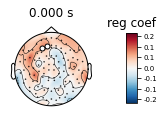

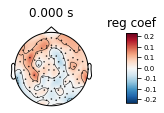

active1_st maximum_PostM
(102, 1)
(102, 1)


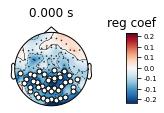

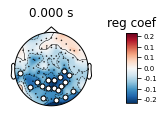

active2_end minimums_PreM
(102, 1)
(102, 1)


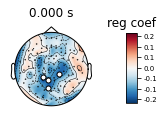

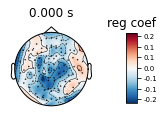

active2_end maximum_PostM
(102, 1)
(102, 1)


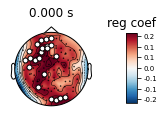

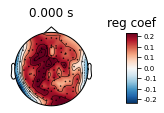

In [44]:
# plot topomaps for every condinions FULL MODEL LMEM
intervals = ['minimums_PreM', 'maximum_PostM']
sessions = ['active1_st', 'active2_end']


for session in sessions:
    for j in intervals:
        print('{0} {1}'.format(session, j))
        df = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor_extremums/{0}_{1}_full_LMEM.csv'.format(session, j))
        fig, fig2 = topomaps_for_mem(df=df, donor = donor)
        fig.savefig('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/topomaps/{0}_{1}_full_LMEM.jpeg'.format(session, j), dpi = 300);
        #fig1.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_space_fdr.jpeg'.format(session, j), dpi = 300);
        fig2.savefig('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/topomaps/{0}_{1}_full_fdr_full_LMEM.jpeg'.format(session, j), dpi = 300);

# LMEM оптимизированная по лучшим сенсора ( с наименьшим pval)

# Probing

In [45]:
# read data, which were obtained by full LMEM (reg coef and p_value for each combined planar - 102)
# 3 - 4 active1
df3 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps_extremums/active1_st_maximum_beta_PostM_choose_by_full_LMEM.csv')
df4 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps_extremums/active1_st_minimum_beta_PreM_choose_by_full_LMEM.csv')

In [46]:
df3['Sensors_name'] = sensors['Name']
df3['Sensors_number'] = sensors['Num']
df4['Sensors_name'] = sensors['Name']
df4['Sensors_number'] = sensors['Num']

In [47]:
# Minimum PreM
x = df4.sort_values(by=['p_val'])
x.head()

,reg_coeff,p_val,Sensors_name,Sensors_number
4,0.129861,0.000028,MEG0212,4
59,0.125915,0.000126,MEG1622,59
19,0.081652,0.005945,MEG0542,19
2,0.090116,0.006533,MEG0132,2
11,0.078929,0.007681,MEG0342,11


In [48]:
# Maximum PostM
y = df3.sort_values(by=['p_val'])
y.head()

,reg_coeff,p_val,Sensors_name,Sensors_number
75,-0.204504,3.059189e-07,MEG2022,75
83,-0.166241,1.240427e-06,MEG2222,83
55,-0.145680,1.444460e-06,MEG1522,55
85,-0.187370,1.654851e-06,MEG2242,85
60,-0.160558,2.300774e-06,MEG1632,60


# Targeted

In [49]:
# read data, which were obtained by full LMEM (reg coef and p_value for each combined planar - 102)
# 3 - 4 active1
ddf3 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps_extremums/active2_end_maximum_beta_PostM_choose_by_full_LMEM.csv')
ddf4 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps_extremums/active2_end_minimum_beta_PreM_choose_by_full_LMEM.csv')

In [50]:
ddf3['Sensors_name'] = sensors['Name']
ddf3['Sensors_number'] = sensors['Num']
ddf4['Sensors_name'] = sensors['Name']
ddf4['Sensors_number'] = sensors['Num']

In [51]:
# Minimum PreM
xx = ddf4.sort_values(by=['p_val'])
xx.head()

,reg_coeff,p_val,Sensors_name,Sensors_number
69,-0.165404,0.001455,MEG1842,69
85,-0.139082,0.010354,MEG2242,85
74,-0.143716,0.011182,MEG2012,74
27,-0.116146,0.015423,MEG0742,27
82,-0.132582,0.016354,MEG2212,82


In [52]:
# Maximum PostM
yy = ddf3.sort_values(by=['p_val'])
yy.head()

,reg_coeff,p_val,Sensors_name,Sensors_number
10,0.263958,0.000004,MEG0332,10
24,0.269660,0.000007,MEG0712,24
19,0.211944,0.000036,MEG0542,19
5,0.232259,0.000069,MEG0222,5
22,0.216366,0.000145,MEG0632,22


active1_st minimum_beta_PreM
(102, 1)
(102, 1)


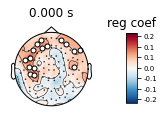

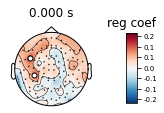

active1_st maximum_beta_PostM
(102, 1)
(102, 1)


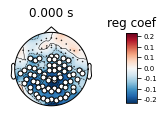

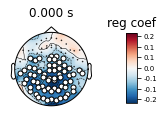

active2_end minimum_beta_PreM
(102, 1)
(102, 1)


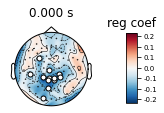

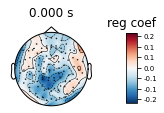

active2_end maximum_beta_PostM
(102, 1)
(102, 1)


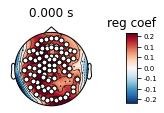

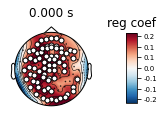

In [53]:
# plot topomaps for every condinions
intervals = ['minimum_beta_PreM', 'maximum_beta_PostM']
sessions = ['active1_st', 'active2_end']


for session in sessions:
    for j in intervals:
        print('{0} {1}'.format(session, j))
        df = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps_extremums/{0}_{1}_choose_by_full_LMEM.csv'.format(session, j))
        fig, fig2 = topomaps_for_mem(df=df, donor = donor)
        fig.savefig('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/topomaps/{0}_{1}.jpeg'.format(session, j), dpi = 300);
        #fig1.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_space_fdr.jpeg'.format(session, j), dpi = 300);
        fig2.savefig('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/topomaps/{0}_{1}_full_fdr.jpeg'.format(session, j), dpi = 300);

# Good luck :)